In [48]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import statsmodels as sm
from statsmodels.sandbox.stats.multicomp import multipletests

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)

%matplotlib inline

# Данные о внебрачных отношениях

Данные используются для объяснения распределения времени между работой, временем, проведенным с супругом/супругой, и временем, проведенным с любовником/любовницей.

http://www.statsmodels.org/stable/datasets/generated/fair.html

Исследуем, как каждый фактор влияет на долю времени, проведенного во внебрачных отношениях.

Посмотрим на данные.
Все переменные, кроме `affairs` являются категориальными, а переменная `affairs` --- вещественной.

In [3]:
data = pd.DataFrame(sm.datasets.fair.load().data)
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


В данных у 2/3 людей вообще не было внебрачных отношений

In [4]:
(data['affairs'] == 0).mean()

0.6775054979579014

У таких людей все хорошо, и мы их не рассматриваем, так что просто удалим их.

In [5]:
data = data[data['affairs'] > 0]
len(data)

2053

Описательные статистики по времени во внебрачных отношениях по всем людям

In [6]:
data['affairs'].describe()

count    2053.000000
mean        2.187243
std         3.437478
min         0.043478
25%         0.521739
50%         1.217391
75%         2.177776
max        57.599991
Name: affairs, dtype: float64

Посмотрим на гистограмму времени во внебрачных отношениях и на гистограмму логарифма этой величины

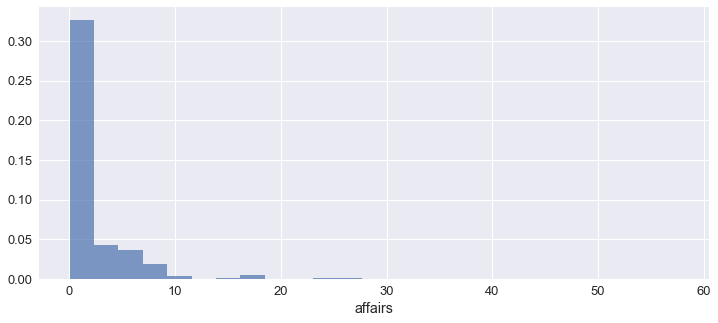

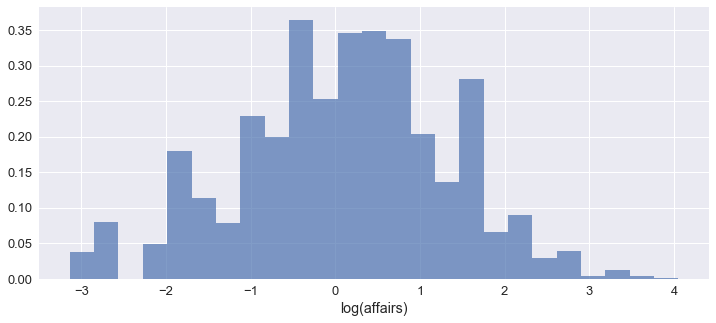

In [9]:
plt.figure(figsize=(12, 5))
plt.hist(data['affairs'], bins=25, alpha=0.7, normed=True)
plt.xlabel('affairs');

data['log(affairs)'] = np.log(data['affairs'])

plt.figure(figsize=(12, 5))
plt.hist(data['log(affairs)'], bins=25, alpha=0.7, normed=True)
plt.xlabel('log(affairs)');

Логарифм времени попахивает нормальностью судя по гистограмме, но критерий Шапиро-Уилка отвергает ее

In [10]:
sps.shapiro(data['log(affairs)'])

(0.9899781942367554, 9.874644157914503e-11)

На QQ plot точки отдаленно расположены вдоль одной прямой

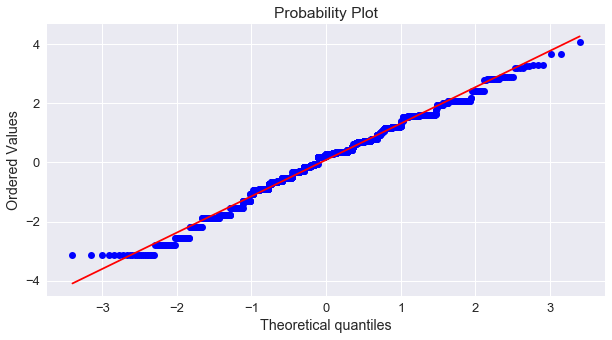

In [12]:
plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
sps.probplot(data['log(affairs)'], plot=ax);

## Анализ влияния факторов

In [45]:
def analyse_factor(factor_name):
    print('Factor ' + factor_name)
    
    gb = data['affairs'].groupby(by=data[factor_name])
    samples = [np.array(group[1]) for group in gb]
    kruskal_result = sps.kruskal(*samples)
    print(kruskal_result)
    
    plt.figure(figsize=(8, 7))
    sns.boxplot(x=data[factor_name], y=data['log(affairs)'])
    plt.show()
    
    return kruskal_result.pvalue

Factor rate_marriage
KruskalResult(statistic=18.79797401228851, pvalue=0.0008611183487432226)


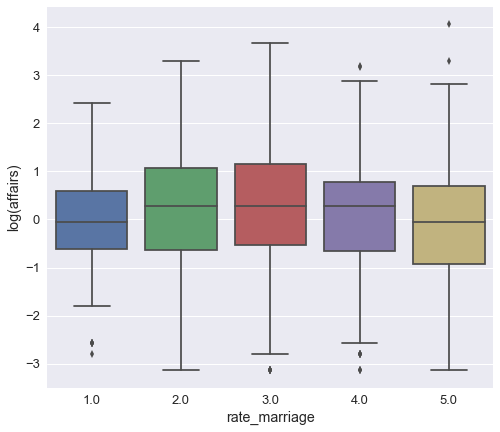



Factor age
KruskalResult(statistic=366.92107249211216, pvalue=3.974891144400868e-77)


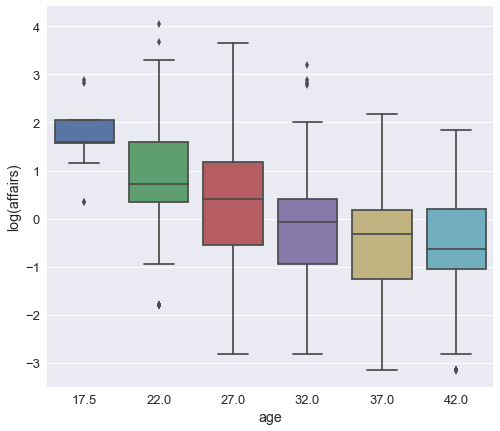



Factor yrs_married
KruskalResult(statistic=465.6566234684575, pvalue=2.0927681559863934e-97)


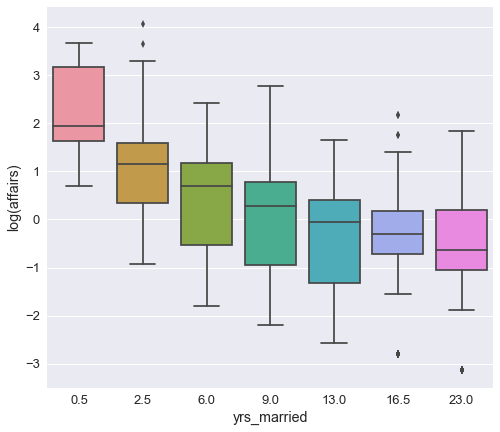



Factor children
KruskalResult(statistic=313.2218528260669, pvalue=1.437105588563059e-65)


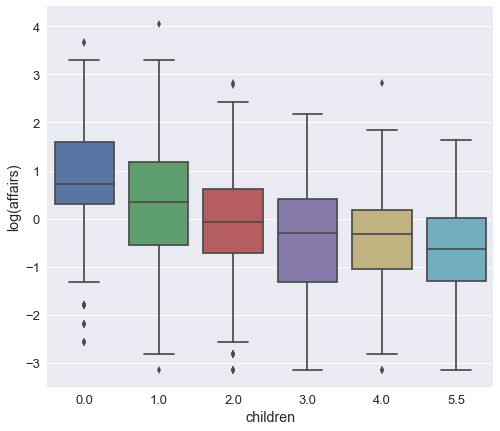



Factor religious
KruskalResult(statistic=44.566982906003965, pvalue=1.1436297209005018e-09)


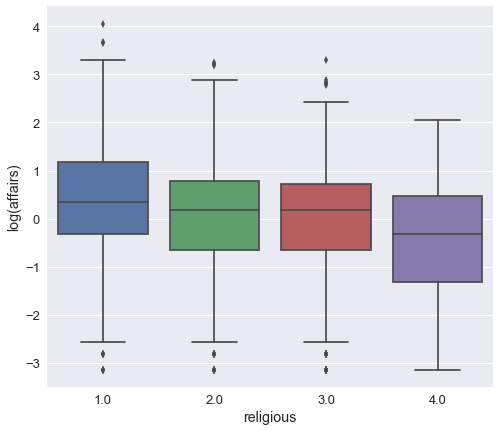



Factor educ
KruskalResult(statistic=12.061049042219755, pvalue=0.03396077556581535)


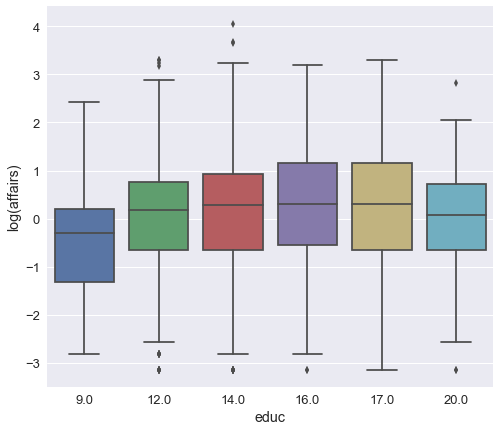



Factor occupation
KruskalResult(statistic=10.43824253852124, pvalue=0.06372848246987972)


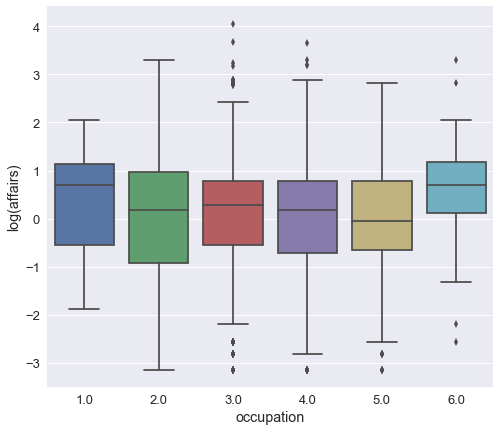

In [46]:
result = pd.DataFrame(columns=['factor', 'pvalue'])

for factor_name in ['rate_marriage', 'age', 'yrs_married', 
                    'children', 'religious', 'educ', 'occupation']:
    pvalue = analyse_factor(factor_name)
    result = result.append({'factor': factor_name, 'pvalue': pvalue}, ignore_index=True)
    print('\n===============================================================\n')

In [50]:
result['pvalue corrected'] = multipletests(result['pvalue'], method='holm')[1]
result['reject'] = result['pvalue corrected'] < 0.05

result

,factor,pvalue,pvalue corrected,reject
0,rate_marriage,8.611183e-04,2.583355e-03,True
1,age,3.974891e-77,2.384935e-76,True
2,yrs_married,2.092768e-97,1.464938e-96,True
3,children,1.437106e-65,7.185528e-65,True
4,religious,1.143630e-09,4.574519e-09,True
5,educ,3.396078e-02,6.792155e-02,False
6,occupation,6.372848e-02,6.792155e-02,False


---------

Прикладная статистика и анализ данных, 2019

Никита Волков

https://mipt-stats.gitlab.io/